## IMAGE SEGMENTATION 
## LEAF DISEASE SEGMENTATION

### NAME: Hemakshi Bhatnagar
### PRN: 21070126036



### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import random,shutil
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,UpSampling2D
import cv2
from mpl_toolkits.mplot3d import Axes3D

C:\Users\bhatn\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### Locating the files

In [3]:
image_source_dir = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\aug_data\\aug_data\\images"
mask_source_dir = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\aug_data\\aug_data\\masks"

# Destination directories for train and val
train_image_dir = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\train\\images"
train_mask_dir = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\train\\masks"
test_image_dir = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\test\\images"

# Creating train and val directories
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(train_mask_dir, exist_ok=True)

os.makedirs(test_image_dir, exist_ok=True)

# Listing all image and mask files
image_files = os.listdir(image_source_dir)
mask_files = os.listdir(mask_source_dir)

# Setting the proportion of data to be used for validation
validation_split = 0.2

# Calculating the number of samples for validation
num_validation_samples = int(len(image_files) * validation_split)
num_train_samples = len(image_files)-num_validation_samples

# Randomly shuffling the list of files
random.shuffle(image_files)

# Moving files to train and val directories
for i, image_file in enumerate(image_files):
    source_image_path = os.path.join(image_source_dir, image_file)
    source_mask_file = os.path.splitext(image_file)[0] + ".png"
    source_mask_path = os.path.join(mask_source_dir, source_mask_file)
    shutil.copy(source_image_path, os.path.join(train_image_dir, image_file))
    shutil.copy(source_mask_path, os.path.join(train_mask_dir, source_mask_file))
    
random.shuffle(image_files)
    
for i, image_file in enumerate(image_files):
    source_image_path = os.path.join(image_source_dir, image_file)
    shutil.copy(source_image_path, os.path.join(test_image_dir, image_file))

print("Data separation complete.")

Data separation complete.


### Visualization of images along with their masks

----------------------------------------------------
----------------------------------------------------
----------------------------------------------------


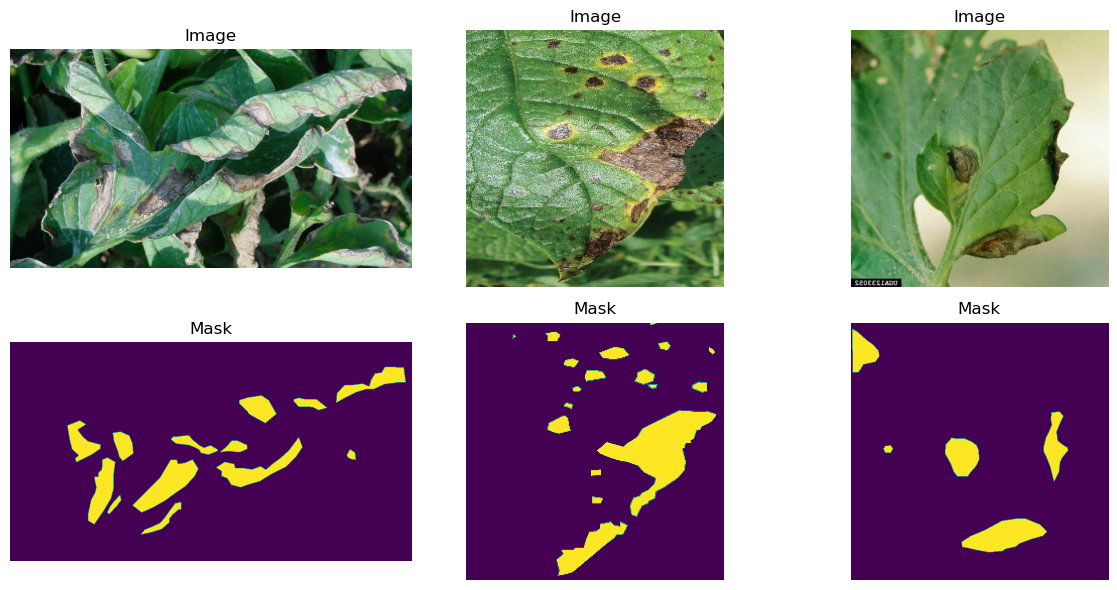

In [10]:
import matplotlib.pyplot as plt

def show_images(loops=1):
    fig, axes = plt.subplots(2, loops, figsize=(12, 6))  # Adjust figsize as needed
    
    for i in range(loops):
        img_path = os.path.join(train_image_dir, image_files[i])
        source_mask_file = os.path.splitext(image_files[i])[0] + ".png"
        mask_path = os.path.join(train_mask_dir, source_mask_file)
        img = Image.open(img_path)
        mask = Image.open(mask_path)
        
        axes[0, i].imshow(img)
        axes[0, i].axis('off')  # Turn off axis
        axes[0, i].set_title('Image')
        
        axes[1, i].imshow(mask)
        axes[1, i].axis('off')  # Turn off axis
        axes[1, i].set_title('Mask')
        
        print("----------------------------------------------------")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

show_images(3)



## Hands-on Basic Image Processing: 

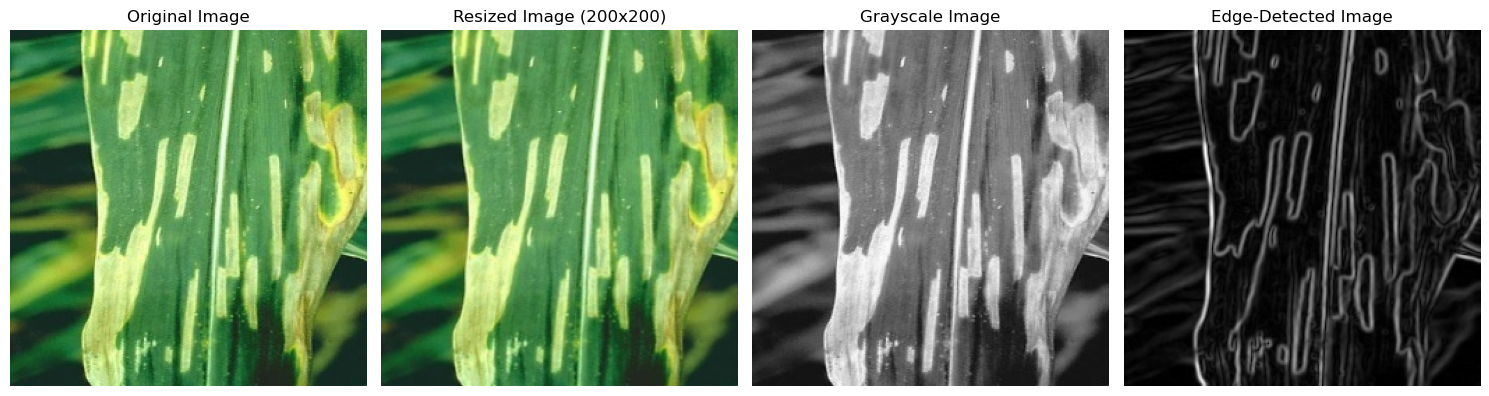

In [11]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color, filters

image_path = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\aug_data\\aug_data\\images\\00540_2.jpg"  
image = cv2.imread(image_path)

# Resizing the image
resized_image = cv2.resize(image, (300, 300))

# Converting the image to grayscale using OpenCV
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying Gaussian blur to the grayscale image
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Applying Canny edge detection using scikit-image
edges = filters.sobel(blurred_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image (200x200)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(edges, cmap='gray')
plt.title("Edge-Detected Image")
plt.axis('off')

plt.tight_layout()
plt.show()


### Subset of images from the dataset

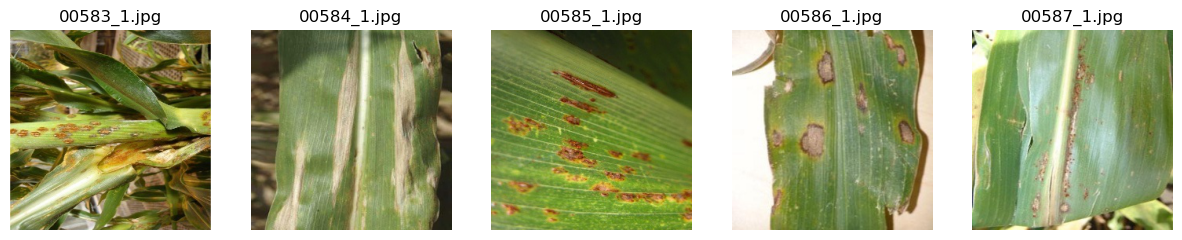

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

photo_filenames = [
    "00583_1.jpg",
    "00584_1.jpg",
    "00585_1.jpg",
    "00586_1.jpg",
    "00587_1.jpg"
]

directory_path = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\aug_data\\aug_data\\images\\"

plt.figure(figsize=(15, 5))

for i, filename in enumerate(photo_filenames, 1):
    file_path = directory_path + filename

    image = Image.open(file_path)

    plt.subplot(1, len(photo_filenames), i)
    
    plt.imshow(image)
    plt.title(filename)
    plt.axis('off')

plt.show()

## Applying Thresholding Techniques

#### Applying various thresholding methods such as:
#### --> Adaptive thresholding
#### --> Gaussian Thresholding
#### --> Simple Thresholding 
#### --> Mean Thresholding


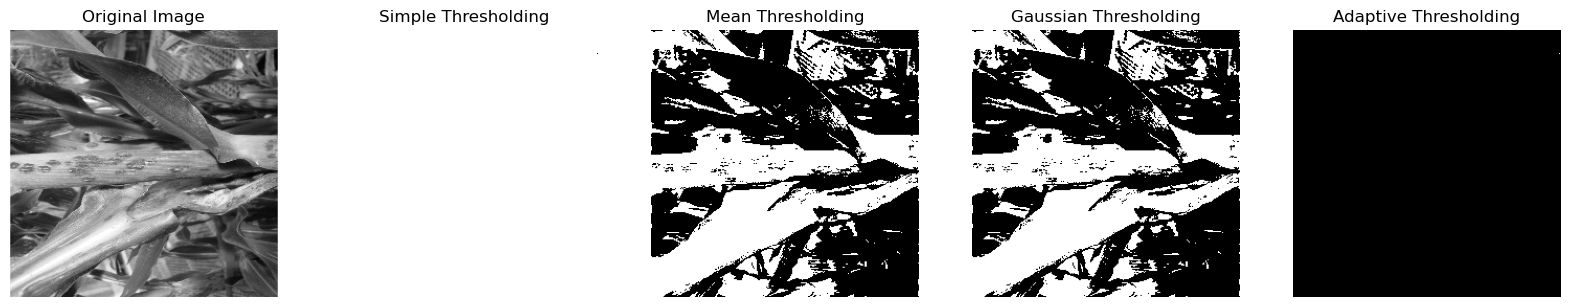

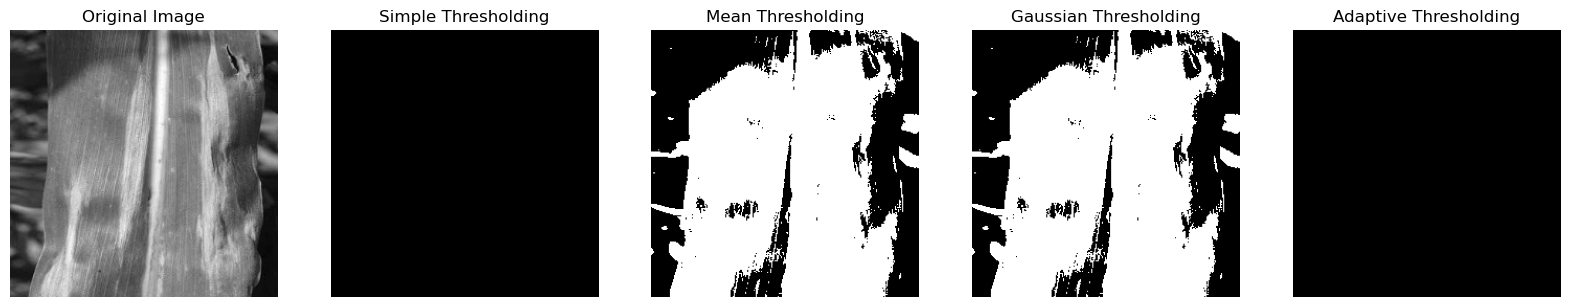

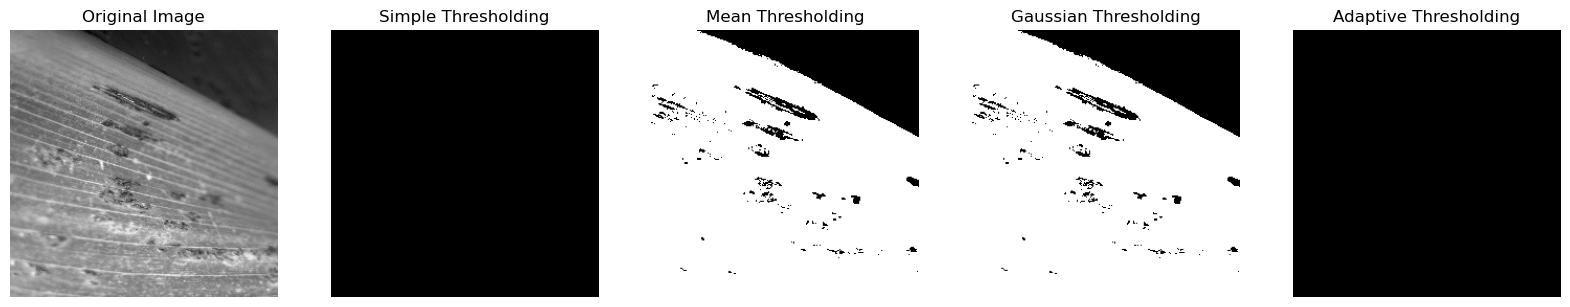

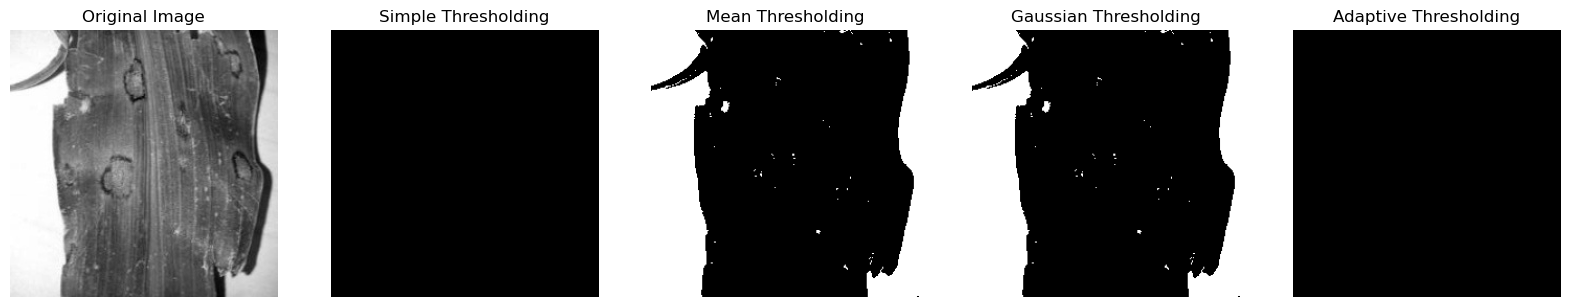

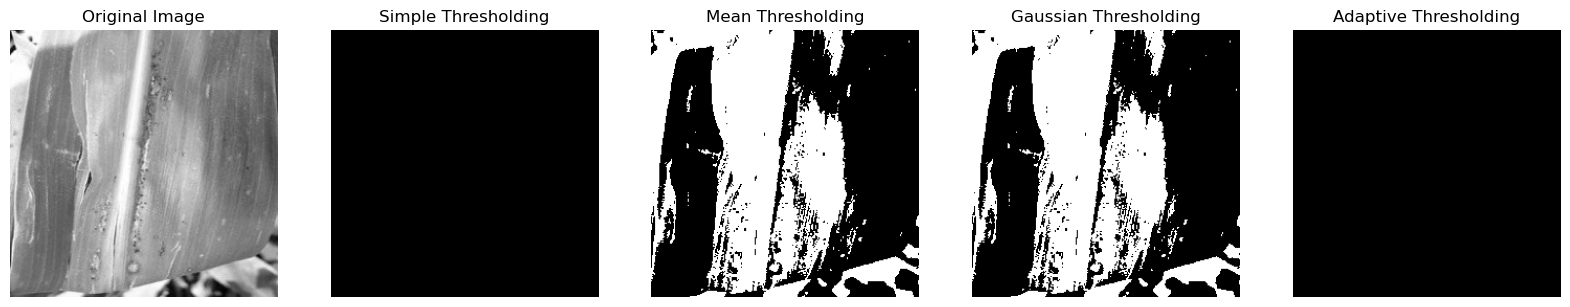

In [13]:
import cv2
import matplotlib.pyplot as plt

# List of filenames of the 5 photos to upload
photo_filenames = [
    "00583_1.jpg",
    "00584_1.jpg",
    "00585_1.jpg",
    "00586_1.jpg",
    "00587_1.jpg"
]

# Define the directory path where your photos are stored
directory_path = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\aug_data\\aug_data\\images\\"

# Thresholding techniques
thresholding_methods = {
    "Simple Thresholding": cv2.THRESH_BINARY,
    "Mean Thresholding": cv2.THRESH_BINARY | cv2.THRESH_OTSU,
    "Gaussian Thresholding": cv2.THRESH_BINARY | cv2.THRESH_OTSU,
    "Adaptive Thresholding": cv2.ADAPTIVE_THRESH_GAUSSIAN_C
}

# Apply thresholding techniques to each image
for filename in photo_filenames:
    # Construct the full file path
    file_path = directory_path + filename
    
    # Read the image using OpenCV
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    
    # Create a single plot with multiple subplots arranged horizontally
    plt.figure(figsize=(20, 5))
    plt.subplot(1, len(thresholding_methods) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Apply different thresholding techniques
    for i, (method_name, threshold_method) in enumerate(thresholding_methods.items(), start=2):
        _, thresholded_image = cv2.threshold(image, 0, 255, threshold_method)
        
        # Display the thresholded image
        plt.subplot(1, len(thresholding_methods) + 1, i)
        plt.imshow(thresholded_image, cmap='gray')
        plt.title(method_name)
        plt.axis('off')
    
    # Show the images
    plt.show()


### Histogram Analysis

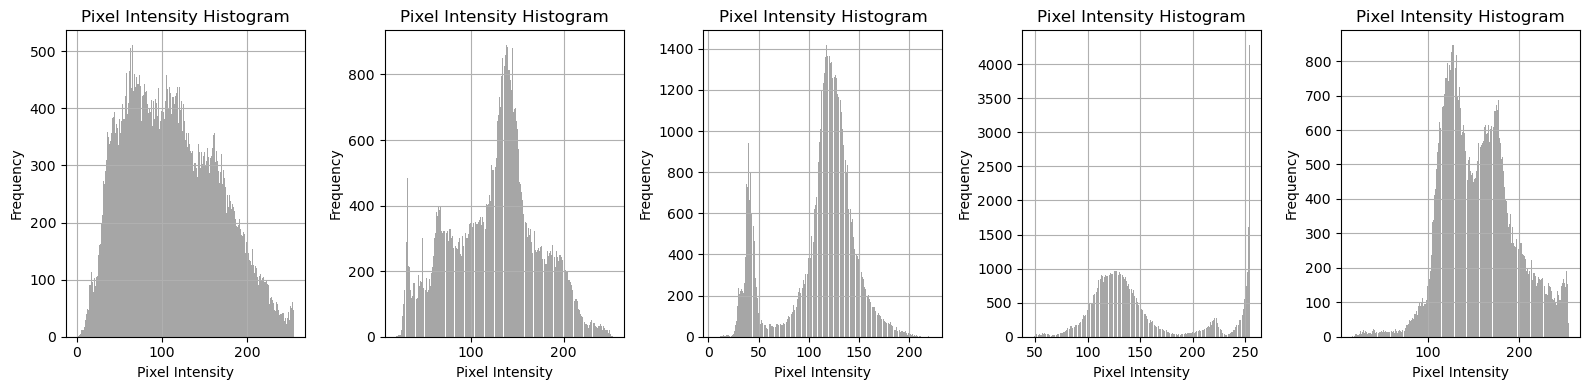

In [38]:
import cv2
import matplotlib.pyplot as plt

photo_filenames = [
    "00583_1.jpg",
    "00584_1.jpg",
    "00585_1.jpg",
    "00586_1.jpg",
    "00587_1.jpg"
]

directory_path = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\aug_data\\aug_data\\images\\"

# Function to plot histograms for images
def plot_image_histogram(image_path, ax):
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # histogram
    ax.hist(image.ravel(), bins=256, color='gray', alpha=0.7)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')
    ax.set_title('Pixel Intensity Histogram')
    ax.grid(True)

# Plotting histograms for each image horizontally
fig, axes = plt.subplots(1, len(photo_filenames), figsize=(16, 4))
for i, filename in enumerate(photo_filenames):
    image_path = os.path.join(directory_path, filename)
    plot_image_histogram(image_path, axes[i])

plt.tight_layout()
plt.show()



## Clustering Algorithms

C:\Users\bhatn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


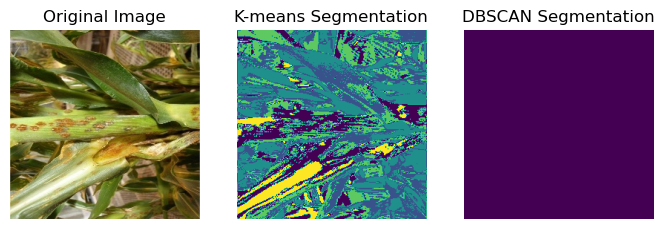

C:\Users\bhatn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


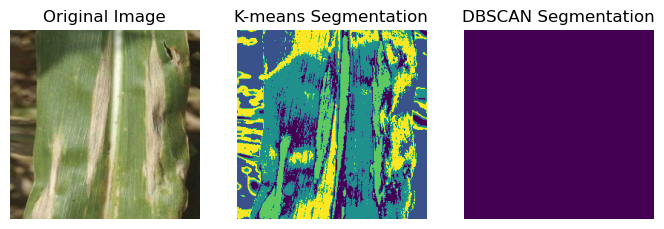

C:\Users\bhatn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


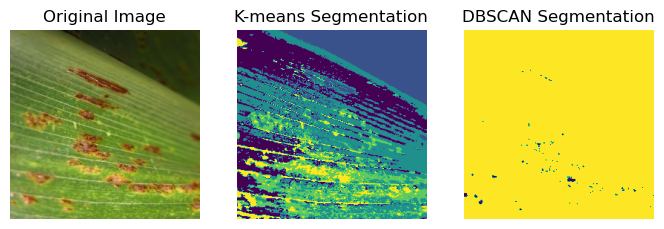

C:\Users\bhatn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


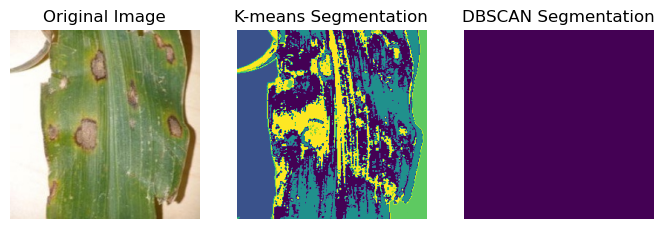

C:\Users\bhatn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


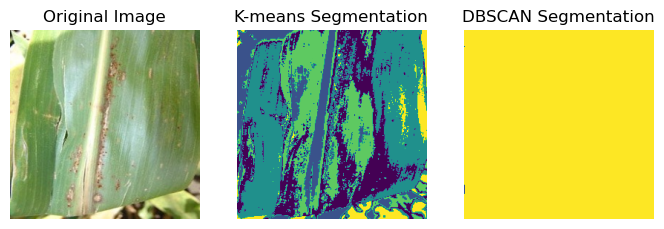

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

directory_path = "C:\\Users\\bhatn\\Downloads\\leaf_disease_detection\\aug_data\\aug_data\\images\\"

photo_filenames = [
    "00583_1.jpg",
    "00584_1.jpg",
    "00585_1.jpg",
    "00586_1.jpg",
    "00587_1.jpg"
]

# Applying clustering algorithms to each image
for filename in photo_filenames:
    # Construct the full file path
    file_path = directory_path + filename
    
    image = cv2.imread(file_path)
    
    # Converting the image to RGB (if it's in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Flattening the image into feature vectors
    feature_vectors = image_rgb.reshape((-1, 3))

    # Standardizing the feature vectors
    scaler = StandardScaler()
    feature_vectors_scaled = scaler.fit_transform(feature_vectors)

    # Applying K-means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans_labels = kmeans.fit_predict(feature_vectors_scaled)
    kmeans_segmented_image = kmeans_labels.reshape(image_rgb.shape[:2])

    # Applying DBSCAN clustering
    dbscan = DBSCAN(eps=0.5, min_samples=100)
    dbscan_labels = dbscan.fit_predict(feature_vectors_scaled)
    dbscan_segmented_image = dbscan_labels.reshape(image_rgb.shape[:2])

    # Visualizing the results
    plt.figure(figsize=(20, 6))

    plt.subplot(1, 7, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 7, 2)
    plt.imshow(kmeans_segmented_image, cmap='viridis')
    plt.title('K-means Segmentation')
    plt.axis('off')

    plt.subplot(1, 7, 3)
    plt.imshow(dbscan_segmented_image, cmap='viridis')
    plt.title('DBSCAN Segmentation')
    plt.axis('off')

    plt.show()


### effectiveness of each algorithm

In [36]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-means
kmeans_silhouette_score = silhouette_score(feature_vectors_scaled, kmeans_labels)

# Calculate silhouette score for DBSCAN
dbscan_silhouette_score = silhouette_score(feature_vectors_scaled, dbscan_labels)

print("Silhouette Score (K-means):", kmeans_silhouette_score)
print("Silhouette Score (DBSCAN):", dbscan_silhouette_score)


Silhouette Score (K-means): 0.41301128215903454
Silhouette Score (DBSCAN): 0.4024170797233725


## Deep Learning Model

In [6]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3



X_train = np.zeros((num_train_samples, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((num_train_samples, IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)


print('Resizing training images and masks')
for i in tqdm(range(num_train_samples), desc='Processing images'):
    img_path = os.path.join(train_image_dir, image_files[i])
    source_mask_file = os.path.splitext(image_files[i])[0] + ".png"
    mask_path = os.path.join(train_mask_dir, source_mask_file)
    
    img = Image.open(img_path)
    img = np.array(img)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[i] = img
    
    mask = Image.open(mask_path).convert('L')
    mask = np.array(mask)
    mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH, 1), mode='constant', preserve_range=True)
    Y_train[i] = mask

    
X_test = np.zeros((num_validation_samples, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []

print('Resizing test images') 
for i in tqdm(range(num_validation_samples), desc='Processing images'):
    img_path = os.path.join(test_image_dir, image_files[i])
    img = Image.open(img_path)
    img = np.array(img)
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[i] = img

Resizing training images and masks


Processing images: 100%|███████████████████████████████████████████████████████████| 2352/2352 [08:41<00:00,  4.51it/s]


Resizing test images


Processing images: 100%|█████████████████████████████████████████████████████████████| 588/588 [01:29<00:00,  6.58it/s]


### After resizing

(128, 128, 3)


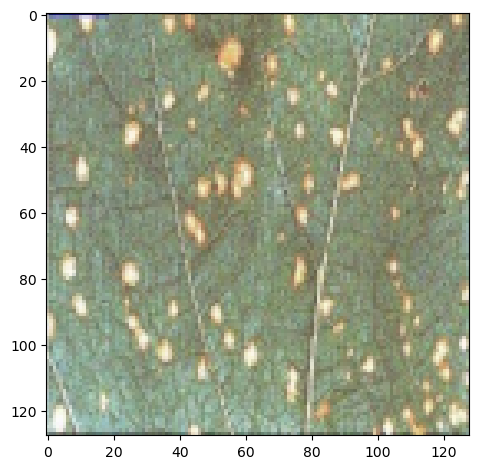

(128, 128, 1)


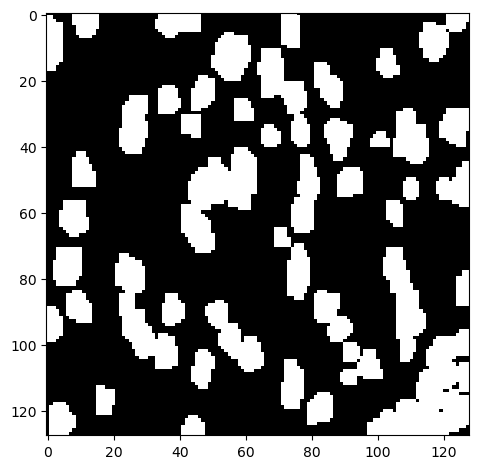

In [7]:
image_x = 6
imshow(X_train[image_x])
print(X_train[image_x].shape)
plt.show()
imshow(np.squeeze(Y_train[image_x]))
print(Y_train[image_x].shape)
plt.show()

### U-Net Model

In [8]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                              

Epoch 1/25
133/133 [==============================] - 155s 1s/step - loss: 0.4724 - accuracy: 0.7814 - val_loss: 0.4324 - val_accuracy: 0.7916
Epoch 2/25
133/133 [==============================] - 161s 1s/step - loss: 0.3935 - accuracy: 0.8251 - val_loss: 0.3977 - val_accuracy: 0.8268
Epoch 3/25
133/133 [==============================] - 164s 1s/step - loss: 0.3718 - accuracy: 0.8369 - val_loss: 0.3502 - val_accuracy: 0.8454
Epoch 4/25
133/133 [==============================] - 165s 1s/step - loss: 0.3533 - accuracy: 0.8448 - val_loss: 0.3519 - val_accuracy: 0.8485
Epoch 5/25
133/133 [==============================] - 164s 1s/step - loss: 0.3372 - accuracy: 0.8522 - val_loss: 0.3743 - val_accuracy: 0.8546


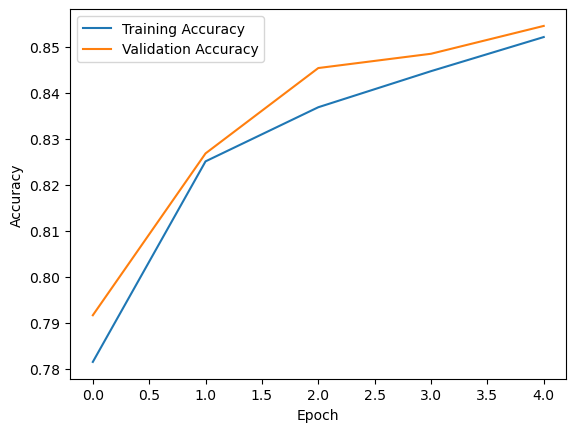

In [17]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('Leaf_segmentation.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
unetacc = history.history['accuracy'][-1]

## Evaluation & Metric analysis

In [34]:
import numpy as np

predicted_masks = model.predict(X_train)  # Predicted masks by the U-Net model

#Intersection over Union (IoU)
def compute_iou(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    iou = intersection / union
    return iou

#Dice coefficient
def compute_dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    dice_coefficient = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice_coefficient

#IoU and Dice coefficient for each image
iou_scores = []
dice_coefficients = []
for i in range(len(ground_truth_masks)):
    iou = compute_iou(ground_truth_masks[i], predicted_masks[i])
    dice = compute_dice_coefficient(ground_truth_masks[i], predicted_masks[i])
    iou_scores.append(iou)
    dice_coefficients.append(dice)

#mean IoU and mean Dice coefficient
mean_iou = np.mean(iou_scores)
mean_dice_coefficient = np.mean(dice_coefficients)

print("Mean Intersection over Union (IoU):", mean_iou)
print("Mean Dice Coefficient:", mean_dice_coefficient)


92/92 [==============================] - 26s 274ms/step
Mean Intersection over Union (IoU): 0.22283294573933088
Mean Dice Coefficient: 0.23365459229105734


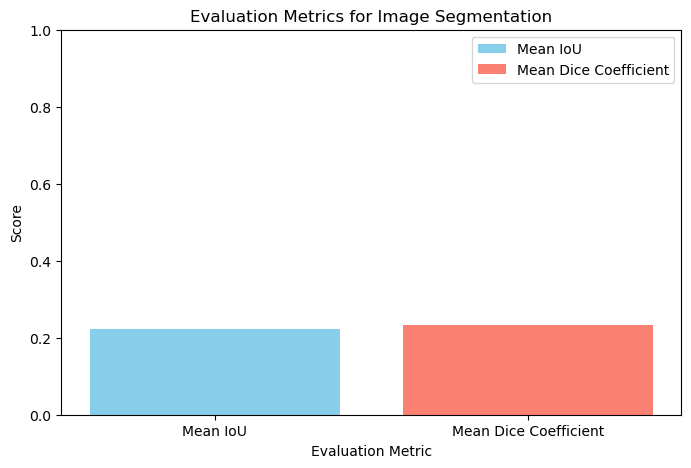

In [41]:
import matplotlib.pyplot as plt

# Mean Intersection over Union (IoU) and Mean Dice Coefficient values
mean_iou = 0.22283294573933088
mean_dice_coefficient = 0.23365459229105734

# Plotting the bar chart
plt.figure(figsize=(8, 5))

# Bar chart for Mean IoU
plt.bar('Mean IoU', mean_iou, color='skyblue', label='Mean IoU')

# Bar chart for Mean Dice Coefficient
plt.bar('Mean Dice Coefficient', mean_dice_coefficient, color='salmon', label='Mean Dice Coefficient')

# Adding labels and title
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Image Segmentation')
plt.ylim(0, 1) 
plt.legend()

plt.show()

